In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_excel('E-com_Data.xlsx')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
from pandas_profiling import ProfileReport
report = ProfileReport(dataset)
report.to_file(output_file = 'e_commerse_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
dataset.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [8]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [9]:
dataset = dataset.rename(columns = {'InvoieNo':'Invoice No', 'Date of purchase':'Date'})

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   Invoice No         537979 non-null  int64         
 3   Date               537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [11]:
dataset = dataset.iloc[:,0:9]
dataset.head()

,CustomerID,Item Code,Invoice No,Date,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [12]:
# check duplicate rows
dataset.duplicated().sum()

9

In [13]:
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,Invoice No,Date,Quantity,Time,price per Unit,Price,Shipping Location
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36


In [14]:
# drop duplicate record
dataset = dataset.drop_duplicates(ignore_index = True)

In [15]:
# check duplicate rows
dataset.duplicated().sum()

0

In [16]:
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
Invoice No                0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [17]:
# drop missing customerid as we can not segregate data without customerid
dataset = dataset.dropna(subset=['CustomerID'])

In [18]:
dataset.isnull().sum()

CustomerID           0
Item Code            0
Invoice No           0
Date                 0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [19]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [20]:
dataset['Date1'] = dataset['Date']

In [22]:
dataset.head(10)

,CustomerID,Item Code,Invoice No,Date,Quantity,Time,price per Unit,Price,Shipping Location,Date1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,2017-10-27
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,2017-02-13
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,2017-05-14
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,2017-05-12
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,2017-09-07


In [ ]:
# Recency - date
# Frequency - data1
# Monetary - Total Price (sum of individual customer id)

In [24]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-12-02 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [28]:
#first     2016-12-02 00:00:00
#last      2017-12-19 00:00:00

#Latest_Date = 20th Dec 2017
import datetime as dt
Latest_Date = dt.datetime(2017,12,20)

RFMScores = dataset.groupby('CustomerID').agg({'Date1': lambda x:(Latest_Date - x.max()).days,
                                             'Date': lambda x :x.nunique(),
                                             'Price': lambda x : x.sum()})

RFMScores['Date'] = RFMScores['Date'].astype(int)

RFMScores.rename(columns = {'Date1' :'Recency', 'Date' :'Frequency', 
                            'Price':'Monetry'}, inplace=True)

RFMScores.reset_index().tail(20)

,CustomerID,Recency,Frequency,Monetry
4329,4353.0,25,21,274078.0
4330,4354.0,173,55,328510.0
4331,4355.0,44,12,39209.0
4332,4356.0,141,6,21484.0
4333,4357.0,26,28,199329.0
4334,4358.0,74,16,97001.0
4335,4359.0,137,2,96.0
4336,4360.0,366,6,18444.0
4337,4361.0,39,10,29440.0
4338,4362.0,3,60,413270.0


In [29]:
RFMScores.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [30]:
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [31]:
RFMScores.Monetry.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetry, dtype: float64

In [32]:
# split the data into four segment basis quantiles method
quantiles = RFMScores.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [33]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetry': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [34]:
# Functions to create R, F and M segment
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
def FnMScoring(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else :
        return 1

In [35]:
# Calcuate R, F and M segment value basis below analysis

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency', quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency', quantiles,))
RFMScores['M'] = RFMScores['Monetry'].apply(FnMScoring, args=('Monetry', quantiles,))

In [38]:
RFMScores.head(20)

,Recency,Frequency,Monetry,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,3,2,1
4.0,19,10,176613.0,2,3,2
5.0,311,7,41976.0,4,4,3
6.0,37,42,151822.0,2,1,2
7.0,208,4,9410.0,4,4,4
8.0,233,10,135550.0,4,3,2
9.0,215,7,65832.0,4,4,3
10.0,25,22,331601.0,2,2,1


In [39]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

In [40]:
RFMScores.head()

,Recency,Frequency,Monetry,R,F,M,RFMGroup
CustomerID,,,,,,,
2.0,4,63,553704.0,1,1,1,111
3.0,77,18,257404.0,3,2,1,321
4.0,19,10,176613.0,2,3,2,232
5.0,311,7,41976.0,4,4,3,443
6.0,37,42,151822.0,2,1,2,212


In [41]:
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)

In [42]:
RFMScores.head(20)

,Recency,Frequency,Monetry,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,3,2,1,321,6
4.0,19,10,176613.0,2,3,2,232,7
5.0,311,7,41976.0,4,4,3,443,11
6.0,37,42,151822.0,2,1,2,212,5
7.0,208,4,9410.0,4,4,4,444,12
8.0,233,10,135550.0,4,3,2,432,9
9.0,215,7,65832.0,4,4,3,443,11
10.0,25,22,331601.0,2,2,1,221,5


In [43]:
Loyalty_level = ['Diamond','Platinum','Gold','Silver']
score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels = Loyalty_level)
RFMScores['RFM_Loyalty_Level'] = score_cuts.values
RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Platinum
2,4.0,19,10,176613.0,2,3,2,232,7,Platinum
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,233,10,135550.0,4,3,2,432,9,Gold
7,9.0,215,7,65832.0,4,4,3,443,11,Silver
8,10.0,25,22,331601.0,2,2,1,221,5,Diamond
9,11.0,34,10,771439.0,2,3,1,231,6,Platinum


In [46]:
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetry', ascending=False).reset_index().head(20)

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,356,17743855.0,1,1,1,111,3,Diamond
2,1346.0,10,237,12647317.0,1,1,1,111,3,Diamond
3,3802.0,3,236,12319439.0,1,1,1,111,3,Diamond
4,4234.0,3,94,10654918.0,1,1,1,111,3,Diamond
5,1006.0,5,211,9351019.0,1,1,1,111,3,Diamond
6,3203.0,5,99,8102167.0,1,1,1,111,3,Diamond
7,2193.0,1,357,7966054.0,1,1,1,111,3,Diamond
8,1448.0,5,190,7892625.0,1,1,1,111,3,Diamond
9,3759.0,10,112,7545149.0,1,1,1,111,3,Diamond


In [47]:
RFMScores.to_csv("Segmented_customer_ecommerce_data.csv")
# this report you can share with your stakeholder

In [48]:
RFMScores = RFMScores.reset_index()
RFMScores

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Platinum
2,4.0,19,10,176613.0,2,3,2,232,7,Platinum
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,7,20480.0,4,4,4,444,12,Silver
4345,4369.0,181,6,10774.0,4,4,4,444,12,Silver
4346,4370.0,9,11,24962.0,1,3,4,134,8,Platinum
4347,4371.0,4,132,280608.0,1,1,1,111,3,Diamond


In [49]:
model_data = RFMScores.iloc[:,1:4]
model_data

,Recency,Frequency,Monetry
0,4,63,553704.0
1,77,18,257404.0
2,19,10,176613.0
3,311,7,41976.0
4,37,42,151822.0
...,...,...,...
4344,278,7,20480.0
4345,181,6,10774.0
4346,9,11,24962.0
4347,4,132,280608.0


In [53]:
# StandardScaler to build euclidean distance
from sklearn.preprocessing import StandardScaler
scaleobj = StandardScaler()
scaled_data = scaleobj.fit_transform(model_data)

scaled_data = pd.DataFrame(scaled_data, index=RFMScores.index, columns=model_data.columns)

In [54]:
scaled_data

,Recency,Frequency,Monetry
0,-0.886877,1.059907,0.377719
1,-0.161877,-0.279737,0.032043
2,-0.737904,-0.517896,-0.062211
3,2.162093,-0.607205,-0.219285
4,-0.559137,0.434740,-0.091133
...,...,...,...
4344,1.834354,-0.607205,-0.244363
4345,0.870999,-0.636975,-0.255686
4346,-0.837219,-0.488126,-0.239134
4347,-0.886877,3.114027,0.059114


# K-Means Algorithm

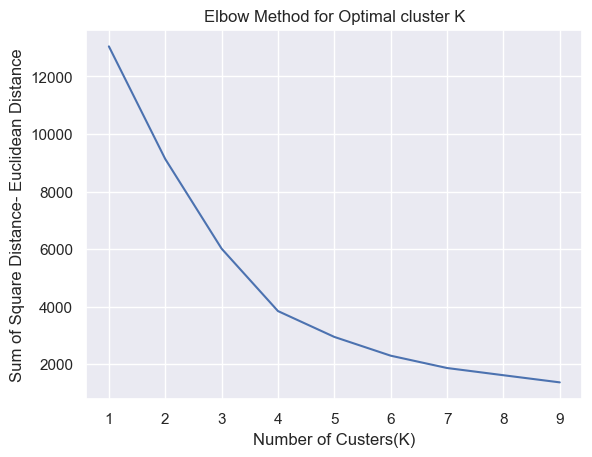

In [60]:
from sklearn.cluster import KMeans

#sum_of_sq_dist = {}
wcss = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(scaled_data)
    wcss.append(km.inertia_)
    
#sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.plot(range(1,10),wcss)
plt.xlabel("Number of Custers(K)")
plt.ylabel("Sum of Square Distance- Euclidean Distance")
plt.title("Elbow Method for Optimal cluster K")
plt.show()

In [64]:
# Optimal K = 4

Kmeans_cluster = KMeans(n_clusters=4, init='k-means++', max_iter=1000)
y_kmeans = Kmeans_cluster.fit_predict(scaled_data)

In [65]:
y_kmeans

array([1, 1, 1, ..., 1, 3, 1])

In [66]:
Kmeans_cluster.labels_

array([1, 1, 1, ..., 1, 3, 1])

In [67]:
RFMScores['Cluster'] = Kmeans_cluster.labels_
RFMScores.head(20)

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond,1
1,3.0,77,18,257404.0,3,2,1,321,6,Platinum,1
2,4.0,19,10,176613.0,2,3,2,232,7,Platinum,1
3,5.0,311,7,41976.0,4,4,3,443,11,Silver,0
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond,1
5,7.0,208,4,9410.0,4,4,4,444,12,Silver,0
6,8.0,233,10,135550.0,4,3,2,432,9,Gold,0
7,9.0,215,7,65832.0,4,4,3,443,11,Silver,0
8,10.0,25,22,331601.0,2,2,1,221,5,Diamond,1
9,11.0,34,10,771439.0,2,3,1,231,6,Platinum,1


In [ ]:
# Now, we wanted to see the centroids value basis cluster
centroid_df = RFMScores.groupby('Cluster')[['Recency',
                                           'Frequency',
                                           'Monetry','CustomerID']].agg({'Recency':'mean',
                                                                        "Frequency":'mean',
                                                                        'Monetry':'mean',
                                                                        'CustomerID':'nunique'}).reset_index()

centroid_df = centroid_df.rename(columns={'CustomerID':'NumBuyers'})
centroid_df

In [71]:
# Now, we wanted to see the centroids value basis cluster
centroid_df_1 = RFMScores.groupby('RFM_Loyalty_Level')[['Recency',
                                           'Frequency',
                                           'Monetry','CustomerID']].agg({'Recency':'mean',
                                                                        "Frequency":'mean',
                                                                        'Monetry':'mean',
                                                                        'CustomerID':'nunique'}).reset_index()

centroid_df_1 = centroid_df_1.rename(columns={'CustomerID':'NumBuyers'})
centroid_df_1

,RFM_Loyalty_Level,Recency,Frequency,Monetry,NumBuyers
0,Diamond,20.096273,61.369565,595010.511646,1288
1,Platinum,63.024238,20.006255,127464.469898,1279
2,Gold,113.329670,9.743956,53334.304505,910
3,Silver,224.927752,6.478211,25304.511468,872


In [72]:
(1288+1279+910+872)

4349

In [73]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)

In [74]:
centroid_df_1

,RFM_Loyalty_Level,Recency,Frequency,Monetry,NumBuyers,Percent
0,Diamond,20.096273,61.369565,595010.511646,1288,29.62
1,Platinum,63.024238,20.006255,127464.469898,1279,29.41
2,Gold,113.329670,9.743956,53334.304505,910,20.92
3,Silver,224.927752,6.478211,25304.511468,872,20.05


# Visualisation

In [75]:
!pip install squarify

  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)


In [76]:
import squarify

In [77]:
centroid_df_2 = centroid_df_1[['RFM_Loyalty_Level','NumBuyers','Percent']]
centroid_df_2

,RFM_Loyalty_Level,NumBuyers,Percent
0,Diamond,1288,29.62
1,Platinum,1279,29.41
2,Gold,910,20.92
3,Silver,872,20.05


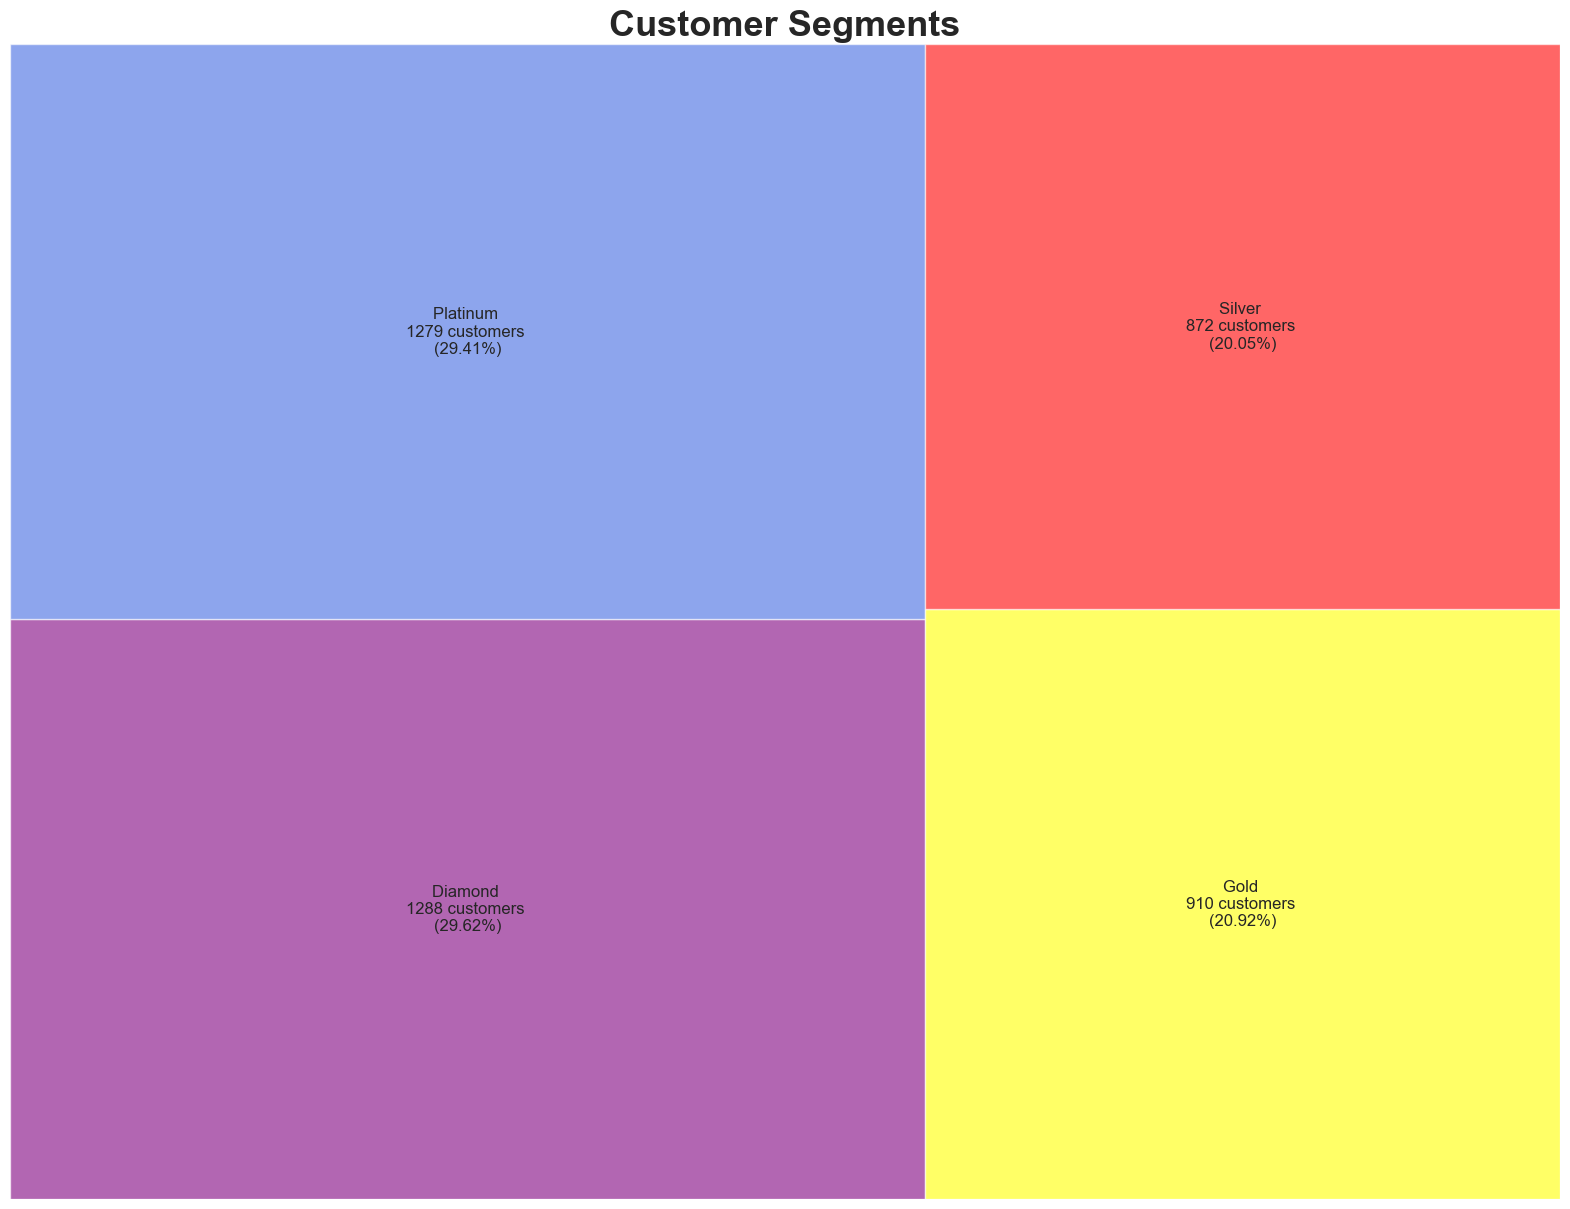

In [78]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict = {'Diamond':'Purple', 'Platinum':'royalblue', 'Gold':'yellow','Silver':'red' }
squarify.plot(sizes=centroid_df_2['NumBuyers'],
              color=colors_dict.values(),
            label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_2.iloc[i])
                   for i in range(0,len(centroid_df_1))],alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight='bold')
plt.axis('off')
plt.show()